<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 4 – Topic Modeling</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform topic modeling to extract important topics and words from textual data..**



**Guidelines**
* Download `abcnews-date-text.csv` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file named `Lab4.ipynb` and submit to D2L `Lab 4 – Topic Modeling (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

### Question 1: Read the content of the `abcnews-date-text.csv` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `headline_text` field content by performing the necessary steps to make it ready for applying topic modeling algorithms. Store the resulted preprocessed text into a list called `headlines`

> **Q1.2.** Using `Explicit Symantic Analysis` algorithm, find and print the top `20` related documents to the following document: 
>>   \['price', 'sugar', 'sweet'\]. 

> **Q1.3.** Using only the first `50` headlines, perform a document clustering using `AgglomerativeClustering` algorithm and plot the resulted dendrogram.

> **Q1.4.** Using `Latent Dirichlett Allocation` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 

> **Q1.5.** Using `Non-Negative Matrix Factorization` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 

In [1]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data = pd.read_csv('abcnews-date-text.csv')



In [3]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove numeric characters and  special characters
    
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return words

In [4]:
# Applying preprocessing to the headline_text column
headlines = data["headline_text"].apply(preprocess_text).tolist()

headlines[:5]  # View first 5 to check


[['aba', 'decides', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witness', 'must', 'aware', 'defamation'],
 ['g', 'call', 'infrastructure', 'protection', 'summit'],
 ['air', 'nz', 'staff', 'aust', 'strike', 'pay', 'rise'],
 ['air', 'nz', 'strike', 'affect', 'australian', 'traveller']]


**Q1.2.** Using `Explicit Symantic Analysis` algorithm, find and print the top `20` related documents to the following document: 
>>   \['price', 'sugar', 'sweet'\]. 


In [5]:
# Define the new document
new_document = ['price', 'sugar', 'sweet']

# Vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([' '.join(doc) for doc in headlines])  # Transform headlines to TF-IDF
query_vec = vectorizer.transform([' '.join(new_document)])  # Transform the new document

# Compute cosine similarity
cos_sim = cosine_similarity(query_vec, X).flatten()

# Get the top 20 most similar documents
top_20_indices = cos_sim.argsort()[-20:][::-1]  # Sort and get the top 20
top_20_documents = [headlines[i] for i in top_20_indices]

for i in range(len(top_20_documents)):
    print(f'{i+1}. {top_20_documents[i]}')



1. ['sugar', 'price', 'forecast', 'sweet']
2. ['sugar', 'price', 'bitter', 'sweet']
3. ['sweet', 'deal', 'sugar']
4. ['sugar', 'outlook', 'sweet']
5. ['china', 'sweet', 'aussie', 'sugar']
6. ['sugar', 'price']
7. ['sweet', 'time', 'sugar', 'community']
8. ['sugar', 'sweet', 'say', 'researcher']
9. ['sweet', 'sugar', 'power', 'revenue', 'mackay', 'sugar']
10. ['sugar', 'region', 'sweet', 'beattie']
11. ['sweet', 'demand', 'push', 'global', 'sugar', 'price', 'four', 'year', 'high']
12. ['ord', 'expansion', 'sweet', 'sugar']
13. ['hope', 'sweet', 'deal', 'boost', 'sugar', 'industry']
14. ['sugar', 'deal', 'sweet', 'msf']
15. ['grower', 'hoping', 'sweet', 'sugar', 'deal']
16. ['sugar', 'festival', 'prof', 'sweet', 'time']
17. ['u', 'sugar', 'industry', 'welcome', 'sweet', 'trade', 'deal']
18. ['sweet', 'outlook', 'sugar', 'cane', 'farmer']
19. ['burdekin', 'sugar', 'crush', 'sweet']
20. ['sugar', 'business', 'sweet', 'csr', 'say']



**Q1.3.** Using only the first `50` headlines, perform a document clustering using `AgglomerativeClustering` algorithm and plot the resulted dendrogram.


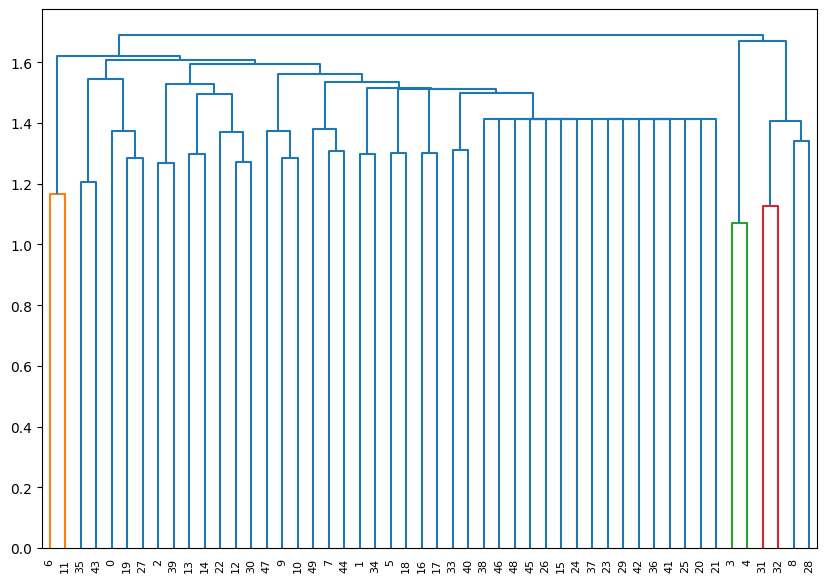

In [6]:
# Limit to first 50 headlines
headlines_sample = headlines[:50]

# Vectorize the text using TF-IDF
X = vectorizer.fit_transform([' '.join(headline) for headline in headlines_sample])

# Perform hierarchical clustering
Z = linkage(X.toarray(), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()



**Q1.4.** Using `Latent Dirichlett Allocation` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 


In [7]:

# Apply LDA
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X)

# Get the top 10 words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))



Topic #0:
fund miss cemetery independent contest wollongong councillor goal freak ruin
Topic #1:
aba broadcasting licence decides change three wale england water boost
Topic #2:
youth homeless vegetable plant processing dispute smithton community help urged
Topic #3:
avenges calleri defeat final massu eliminate council england fed fate
Topic #4:
barca record antic breaking delighted contribute million aid fate de
Topic #5:
harassed dismisses brigadier report troop chemical still clean cost trying
Topic #6:
crash head highway injured phoned dying passenger four subway korean
Topic #7:
victim see centrelink bushfire direct govt soldier urge anger urged
Topic #8:
iraqi plebiscite dems conflict hold south climb death toll continues
Topic #9:
council rise insurance nz australia big plan opp air crean
Topic #10:
business terrorist attack prepare stosur aussie memphis waste qualifier match
Topic #11:
breakthrough insurance welcome locked timetable war expression interest build livestock
Topic


> **Q1.5.** Using `Non-Negative Matrix Factorization` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 

In [8]:
# Apply NMF
nmf = NMF(n_components=20, random_state=42)
nmf.fit(X)

# Get the top 10  words for each topic
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    


Topic #1:
council welcome breakthrough levy decision ambulance insurance fails executive position
Topic #2:
strike air nz australian affect traveller staff pay aust rise
Topic #3:
subway korean dying phoned passenger toll continues climb death south
Topic #4:
ahead move bathhouse plan go fuel ethanol blend call heritage
Topic #5:
barca record breaking delighted antic birthday celebrates take robson leadership
Topic #6:
summit call infrastructure protection commonplace tv digital become fuel ethanol
Topic #7:
opp national fed introduce insurance war locked timetable australia breakthrough
Topic #8:
four match qualifier stosur waste aussie memphis crash head highway
Topic #9:
urged community youth homeless help bushfire centrelink victim see broadcasting
Topic #10:
troop harassed dismisses report brigadier arriving kuwait daily combat british
Topic #11:
fire expected threat dargo rise witness defamation act must aware
Topic #12:
win jump triple ambitious olsson bryant double lead lakers 

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

### Reflection on Topic Modeling 
This module introduced me to useful text modeling methods like topic modeling and document clustering, which are key for analyzing large sets of text data in the real world..
I worked with the dataset and started by cleaning the text,removing stopwords, tokenization  which was a crucial first step. It was taking longer than expected I initially used a the first 100. After that, I used Agglomerative Clustering and created a dendrogram to visualize how the documents were grouped based on similarities. For topic modeling, I applied Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) to extract the main topics from the dataset. 
Seeing the top words in each topic made the process more appreciated and prepares me for my project where I utilized same approache to analyze ESG reports and assess performance of copmanies. 
These methods are valuable for real-world applications. In my project to analyze reports for ESG,I can use text modeling to organize and analyze text data to rank text based on impotance and relevants to a topic and set of documents make better decisions. This module gave me practical experience in text mining and topic modeling. These skills are going to be helpful for my future work and studies, especially when dealing with large sets of text data.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab4.ipynb** to the **Lab 4 – Topic Modeling (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                            | Excellent                                             | Good                                                  | Average                                                   | Below Average                                                | Poor                                                         | No Attempt                               |
|--------------------------------------|------------------------------------------------------|-------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|--------------------------------------------------------------|------------------------------------------|
| **Part 1:** Activity-Question 1.1    | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question |
| **Part 1:** Activity-Question 1.2    | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question |
| **Part 1:** Activity-Question 1.3    | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question |
| **Part 1:** Activity-Question 1.4    | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question |
| **Part 1:** Activity-Question 1.5    | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question |
| **Part 2:** Reflection                | **10 points** - Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points** - Reflection mostly ties to the module content; experience & importance are discussed | **6 points** - Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points** - Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points** - Minimal effort to tie to content; minimal effort to describe experience/importance | **0 points** - Did not complete the reflection |


#### Reflection on Text Mining Techniques
This module introduced me to useful text mining methods like topic modeling and document clustering, which are key for analyzing large sets of text data.

I worked with the dataset and started by cleaning the text, with a pre-processor function that removes stopwords non alphabetic, special charaters ,tokenization  which was a crucial first step. It was taking longer than expected I initially used a the first 100. After that, I used Agglomerative Clustering and created a dendrogram to visualize how the documents were grouped based on similarities.

For topic modeling, I applied Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) to extract the main topics from the dataset. 
Seeing the top words in each topic made the process more appreciated

These methods are valuable for real-world applications. In my project to analyze reports for ESG,I can use text mining to analyze organize and analyze text data to make better decisions. 

Conclusion

This module gave me practical experience in text mining and topic modeling. These skills are going to be helpful for my future work and studies, especially when dealing with large sets of text data.